In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2

%matplotlib inline
pd.options.display.max_columns = 100

In [474]:
data = pd.read_csv('train.csv')

In [475]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


Видим, что полностью заполнены почти все колонки, кроме LifeSquare и Healthcare_1. LifeSquare можно дозаполнить, используя колонки с общей площадью и жилой площадью дргих квартир. Healthcare_1 непонятный столбец, в нем почти полвина незаолненных значений и есть похожий на него столбец Helthcare_2, поэтому не будем его использовать в модели.

In [477]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [478]:
train.shape

(7000, 20)

In [479]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.0+ MB


Уберем из train подозрительные квартиры, где комнат более, чем 5. Таких квартир очень мало, они не должны повлиять на модель

In [480]:
train = train[(train['Rooms']<6) & (train['Rooms']>0)]
train.shape

(6992, 20)

#### Анализ выбросов в Square

In [481]:
train['Rooms'].value_counts()

2.0    2725
1.0    2594
3.0    1558
4.0     103
5.0      12
Name: Rooms, dtype: int64

Разобьем набор данных на группы по количеству комнат и проанализируем столбец Square для каждой группы

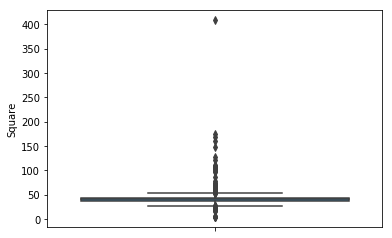

In [482]:
train_1 = train[train.Rooms==1]
sns.boxplot(train_1['Square'], orient='v')

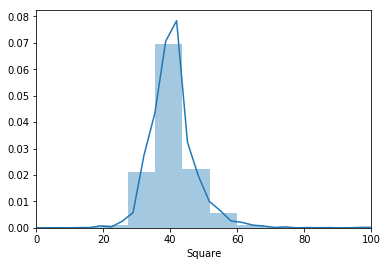

In [483]:
plt.xlim(0, 100)
sns.distplot(train_1['Square'])

Видим, что основная часть 1-комнатных квартир имеет площадь  примерно от 21 до 70 кв.м. 

Проделаем то же самое для 2-х, 3-х, 4-х и 5-ти комнатных квартир

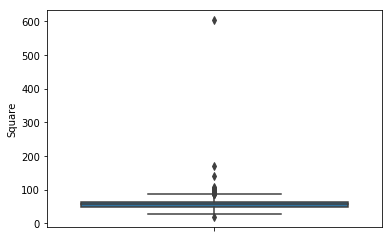

In [484]:
train_2 = train[train.Rooms==2]
sns.boxplot(train_2['Square'], orient='v')

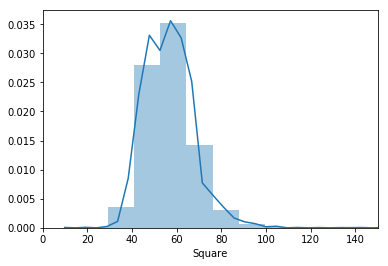

In [485]:
plt.xlim(0, 150)
sns.distplot(train_2['Square'])

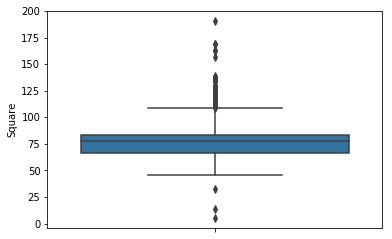

In [486]:
train_3 = train[train.Rooms==3]
sns.boxplot(train_3['Square'], orient='v')

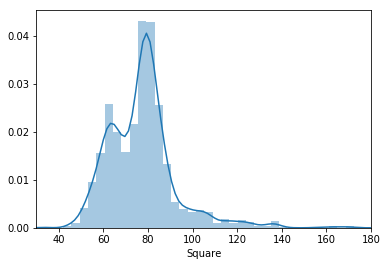

In [487]:
plt.xlim(30, 180)
sns.distplot(train_3['Square'])

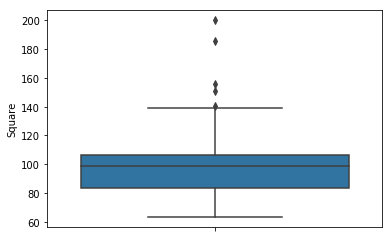

In [488]:
train_4 = train[train.Rooms==4]
sns.boxplot(train_4['Square'], orient='v')

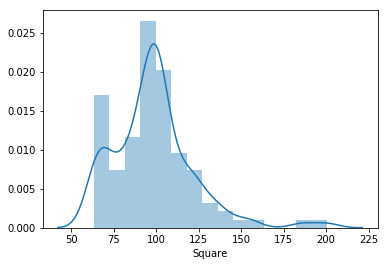

In [489]:
sns.distplot(train_4['Square'])

In [490]:
train[train['Rooms']==5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4762,4070,21,5.0,114.313752,88.492650,9.0,6,5.0,1960,0.034331,B,B,25,5487,3,NaN,0,4,B,499830.937577
5361,2879,78,5.0,118.871952,69.023509,10.0,15,16.0,1998,0.092291,B,B,21,4346,2,165.0,1,2,B,496026.671162
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,455446.393758
8726,238,88,5.0,90.762276,70.991790,5.0,1,9.0,1972,0.127376,B,B,43,8429,3,NaN,3,9,B,289683.939174
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,622888.825328
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,B,A,31,7010,5,4508.0,3,7,B,310305.074733
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,B,B,17,3079,59,2890.0,0,8,B,479525.147323
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,206148.845716
8925,4214,105,5.0,85.313605,56.686693,5.0,4,12.0,1967,0.040243,B,B,25,3478,11,2729.0,3,1,B,461678.738428


Функция удаления строк с выбросами по площадям:

In [491]:
def trim_square(df):
    df = df[(df['Rooms']!=1) | (df['Square']>21) & (df['Square']<66)]
    df = df[(df['Rooms']!=2) | (df['Square']>30) & (df['Square']<100)]
    df = df[(df['Rooms']!=3) | (df['Square']>45) & (df['Square']<140)]
    df = df[(df['Rooms']!=4) | (df['Square']>55)]
    df = df[(df['Rooms']!=5) | (df['Square']>43)]
    return df

Для замены значений Square, которые являются выбросами, найдем среднюю стоимость 1 квадратного метра в каждой группе квартир, разбитых по району и количеству комнат. Затем для тех квартир, где площадь имеет значение-выброс, заменим это значение на стоимость этой квартиры, деленную на среднюю стоимость 1 квадратного метра для квартир в этом районе и с таким же количеством комнат

In [492]:
def clean_square(df):
    avg_square = df.groupby(['DistrictId', 'Rooms'], as_index=False)[['Square']].mean()
    avg_price = df.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean()
    avg_square_price = pd.merge(avg_square, avg_price, on=['DistrictId', 'Rooms'], how='inner')
    avg_square_price['sm_mean'] = avg_square_price['Price']/avg_square_price['Square']
    avg_square_price = avg_square_price.loc[:, ['DistrictId', 'Rooms', 'sm_mean']]
    if 'sm_mean' not in df.columns:
        df = pd.merge(df, avg_square_price, on=['DistrictId', 'Rooms'], how='left')
    df.loc[(df['Rooms']!=1) | (df['Square']>21) & (df['Square']<66), 'Square'] = df['Price']/df['sm_mean']
    df.loc[(df['Rooms']!=2) | (df['Square']>30) & (df['Square']<100), 'Square'] = df['Price']/df['sm_mean']
    df.loc[(df['Rooms']!=3) | (df['Square']>45) & (df['Square']<140), 'Square'] = df['Price']/df['sm_mean']
    df.loc[(df['Rooms']!=4) | (df['Square']>55), 'Square'] = df['Price']/df['sm_mean']
    df.loc[(df['Rooms']!=5) | (df['Square']>43), 'Square'] = df['Price']/df['sm_mean']
    return df

### Заполним LifeSquare

Посчитаем на нем среднюю UnLifeSquare для каждой группы квартир, разбитых по числу комнат, в которых заполнена LifeSquare и удалены выбросы по LifeSquare. Затем для незаполненных LifeSquare рассчитаем ее как Square-UnLifeSquare

Проверим и устраним выбросы в LifeSquare

In [493]:
not_empty_lifesquare = train[train['LifeSquare'].notnull()]

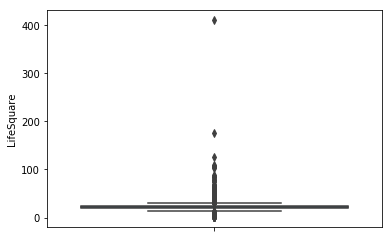

In [494]:
train_1 = not_empty_lifesquare[not_empty_lifesquare.Rooms==1]
sns.boxplot(train_1['LifeSquare'], orient='v')

(array([  4.,  10.,  10.,  11.,   8.,  11.,   7.,   0.,   0.,   0.,   1.,
          0.,   2.,   3.,   2.,   3.,   4.,  12.,  22.,  23.,  45.,  72.,
        128., 198., 199., 215., 204., 178., 107.,  63.,  20.,   6.,   5.,
         10.,   5.,   6.,  11.,   6.,   5.,   5.,   6.,   5.,   8.,   4.,
          7.,  16.,  15.,  24.,  27.,  29.,  34.,  21.,  16.,  22.,  11.,
         13.,  12.,   7.,  10.,   5.,   8.,  14.,   3.,   4.,   4.,   4.,
          0.,   2.,   2.,   0.,   2.,   2.,   0.,   2.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

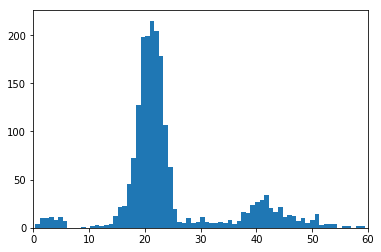

In [495]:
plt.xlim(0, 60)
plt.hist(train_1['LifeSquare'], bins=500)

Для 1 комнатных квартир устраняем выбросы ниже 10 кв м и выше 55 кв м

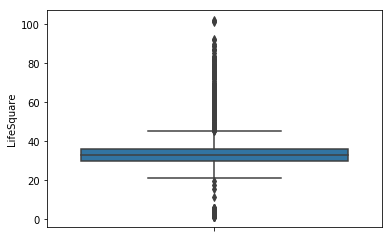

In [496]:
train_2 = not_empty_lifesquare[not_empty_lifesquare.Rooms==2]
sns.boxplot(train_2['LifeSquare'], orient='v')

(array([ 11.,  12.,  10.,   8.,  14.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   7.,  27.,
         30.,  29.,  47.,  51.,  91., 104., 142., 190., 190., 222., 203.,
        132.,  97.,  73.,  38.,  25.,  18.,  20.,  10.,  12.,   8.,   7.,
          4.,   5.,   7.,   5.,   2.,   4.,   7.,   7.,  16.,  11.,   7.,
         10.,  10.,  11.,  15.,  26.,  18.,  12.,  12.,  12.,  14.,  13.,
          5.,   5.,   2.,   1.,   5.,   1.,   7.,   4.,   2.,   3.,   4.,
          4.,   1.,   5.,   2.,   2.,   1.,   0.,   2.,   1.,   2.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.]), array([  0.79553947,   1.80782861,   2.82011775,   3.83240689,
          4.84469604,   5.85698518,   6.86927432,   7.88156346,
          8.8938526 ,   9.90614175,  10.91843089,  11.93072003,
         12.94300917,  13.95529832,  14.96758746,  15.9798766 ,
         16.99216574,  18.00445488,  19.01674403,  20.02903317,

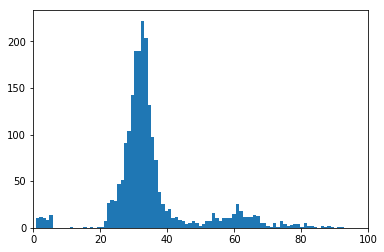

In [497]:
plt.xlim(0, 100)
plt.hist(train_2['LifeSquare'], bins=100)

Для 2 комнатных квартир устраняем выбросы ниже 20 кв м и выше 70 кв м

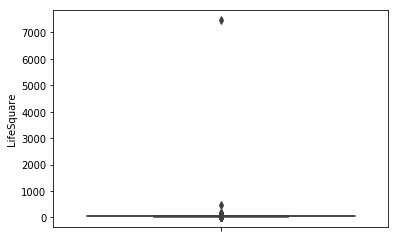

In [498]:
train_3 = not_empty_lifesquare[not_empty_lifesquare.Rooms==3]
sns.boxplot(train_3['LifeSquare'], orient='v')

(array([ 19.,   0.,   1.,   2.,  62., 407., 510.,  93.,  31.,  33.,  63.,
         27.,  14.,   8.,   5.,   3.,   5.,   0.,   3.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

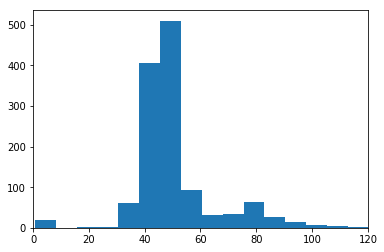

In [499]:
plt.xlim(0, 120)
plt.hist(train_3['LifeSquare'], bins=1000)

Для 3 комнатных квартир устраняем выбросы ниже 30 кв м и выше 100 кв м

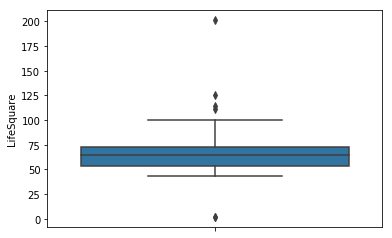

In [500]:
train_4 = not_empty_lifesquare[not_empty_lifesquare.Rooms==4]
sns.boxplot(train_4['LifeSquare'], orient='v')

(array([ 2.,  0.,  0.,  0., 18., 19., 34., 14.,  4.,  5.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.45184596,  11.46062171,  21.46939746,  31.47817321,
         41.48694896,  51.49572471,  61.50450046,  71.51327621,
         81.52205196,  91.53082771, 101.53960346, 111.54837921,
        121.55715496, 131.56593071, 141.57470645, 151.5834822 ,
        161.59225795, 171.6010337 , 181.60980945, 191.6185852 ,
        201.62736095]),
 <a list of 20 Patch objects>)

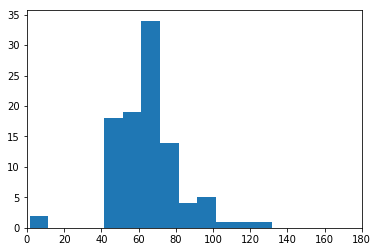

In [501]:
plt.xlim(0, 180)
plt.hist(train_4['LifeSquare'], bins=20)

In [502]:
Для 4 комнатных квартир устраняем выбросы ниже 40 кв м и выше 130 кв м

SyntaxError: invalid syntax (<ipython-input-502-f05ed7f5120b>, line 1)

In [ ]:
train_5 = not_empty_lifesquare[not_empty_lifesquare.Rooms==5]
sns.boxplot(train_5['LifeSquare'], orient='v')

В 5-комнатных LifSquare ок

In [503]:
def trim_lifesquare(df):
    df = df[(df['Rooms']!=1) | (df['LifeSquare']>10) & (df['LifeSquare']<55)]
    df = df[(df['Rooms']!=2) | (df['LifeSquare']>20) & (df['LifeSquare']<70)]
    df = df[(df['Rooms']!=3) | (df['LifeSquare']>30) & (df['LifeSquare']<100)]
    df = df[(df['Rooms']!=4) | (df['LifeSquare']>40) & (df['LifeSquare']<130)]
    return df

Функция для заполнения пустых LifeSquare

In [504]:
def fill_empty_lifesquare(df):
    not_empty_lifesquare = df[df['LifeSquare'].notnull()]
    not_empty_lifesquare = trim_lifesquare (not_empty_lifesquare)
    mean_square = not_empty_lifesquare.groupby('Rooms', as_index=False)['Square'].mean()
    mean_lifesquare = not_empty_lifesquare.groupby('Rooms', as_index=False)['LifeSquare'].mean()
    mean_unlife_square = pd.merge(mean_square, mean_lifesquare, on = 'Rooms', how='inner')
    mean_unlife_square['mean_unlife_square'] = mean_unlife_square['Square'] - mean_unlife_square['LifeSquare']
    mean_unlife_square = mean_unlife_square.loc[:, ['Rooms', 'mean_unlife_square']]
    if 'mean_unlife_square' not in df.columns:
        df = pd.merge(df, mean_unlife_square, on = 'Rooms', how='left')
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] - df['mean_unlife_square']
    return df

А теперь очистим LifeSquare на всем наборе данных от выбросов

In [505]:
def clean_lifesquare(df):
    df.loc[(df['Rooms']!=1) | (df['LifeSquare']>10) & (df['LifeSquare']<55), 'LifeSquare'] = df['Square'] - df['mean_unlife_square']
    df.loc[(df['Rooms']!=2) | (df['LifeSquare']>20) & (df['LifeSquare']<70), 'LifeSquare'] = df['Square'] - df['mean_unlife_square']
    df.loc[(df['Rooms']!=3) | (df['LifeSquare']>30) & (df['LifeSquare']<100), 'LifeSquare'] = df['Square'] - df['mean_unlife_square']
    df.loc[(df['Rooms']!=4) | (df['LifeSquare']>40) & (df['LifeSquare']<130), 'LifeSquare'] = df['Square'] - df['mean_unlife_square']
    return df

#### Анализ выбросов в KitchenSquare

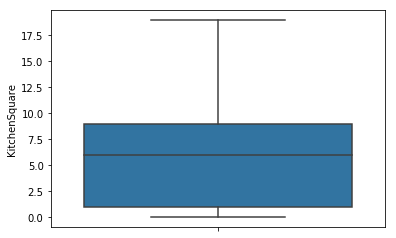

In [506]:
sns.boxplot(train_trim_square['KitchenSquare'], orient='v')

(array([ 473.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1691.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   14.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   27.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

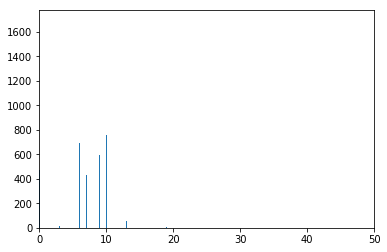

In [507]:
plt.xlim(0, 50)
plt.hist(train_trim_square['KitchenSquare'], bins=500)

In [508]:
def trim_kitchensquare(df):
    df = df[df['KitchenSquare']<20]
    return df

In [509]:
def clean_kitchensquare(df):
    train_kitchen = df[(df['KitchenSquare']<20) & (df['KitchenSquare']>4)]
    mean_kitchensquare = train_kitchen.groupby('Rooms', as_index=False)['KitchenSquare'].mean()
    mean_kitchensquare.columns = ['Rooms', 'mean_kitchen_square']
    if 'mean_kitchen_square' not in df.columns:
        df = pd.merge(df, mean_kitchensquare, on = 'Rooms', how='left')
    df.loc[df['KitchenSquare']>20, 'KitchenSquare'] = df['mean_kitchen_square']
    return df

#### Анализ HouseYear на train и valid

In [510]:
train[train['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [511]:
train.loc[train['HouseYear'] == 20052011,'HouseYear'] = 2011
train.loc[train['HouseYear'] == 4968,'HouseYear'] = 1968

In [512]:
valid[valid['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Анализ Ecology_2 и Ecology_3

In [513]:
train['Ecology_2'].value_counts()

B    6928
A      64
Name: Ecology_2, dtype: int64

In [514]:
train['Ecology_3'].value_counts()

B    6790
A     202
Name: Ecology_3, dtype: int64

Приведем значения этих столбцов к числовым: 0 и 1

In [515]:
def ecology (df):
    if 'B' in df['Ecology_2'].tolist():
        df['Ecology_2'] = (df['Ecology_2'] == 'B').astype(int)
    if 'B' in df['Ecology_3'].tolist():
        df['Ecology_3'] = (df['Ecology_3'] == 'B').astype(int)
    return df

#### Анализ Social_1, Social_2 и Social_3

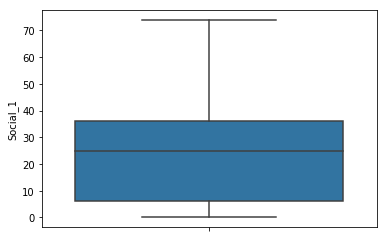

In [516]:
sns.boxplot(train['Social_1'], orient='v')

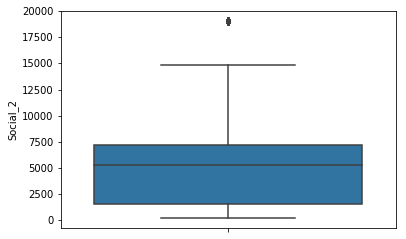

In [517]:
sns.boxplot(train['Social_2'], orient='v')

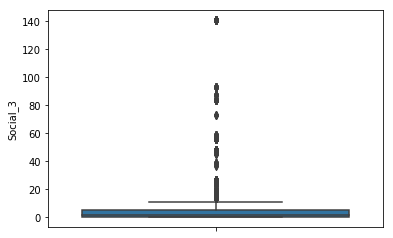

In [518]:
sns.boxplot(train['Social_3'], orient='v')

In [519]:
train_trim_square['Social_3'].describe()

count    6889.000000
mean        7.999710
std        23.702185
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       141.000000
Name: Social_3, dtype: float64

#### Анализ оставшихся столбцов

In [520]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


In [521]:
train['Helthcare_2'].value_counts().sort_index()

0    2941
1    1548
2     817
3    1146
4     208
5     261
6      71
Name: Helthcare_2, dtype: int64

In [522]:
train['Shops_1'].value_counts().sort_index()

0     1584
1      951
2      664
3      501
4      603
5      911
6      337
7      209
8      182
9      224
10     158
11     275
15     122
16      61
19      37
23     173
Name: Shops_1, dtype: int64

Приведем значения Shops_2 к 0 и 1

In [523]:
train['Shops_2'].value_counts().sort_index()

A     584
B    6408
Name: Shops_2, dtype: int64

In [524]:
def shops_2(df):
    if 'B' in df['Shops_2'].tolist():
        df['Shops_2'] = (df['Shops_2'] == 'B').astype(int)
    return df

#### Сделаем столбец со средней ценой, сгруппируя по району и количеству комнат

In [627]:
def train_trim(df):
    df = trim_square(df)
    df = trim_lifesquare(df)
    df = trim_kitchensquare(df)
    return df

In [636]:
trimmed_train = train_trim(train)

In [629]:
mean_price = trimmed_train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
rename(columns={'Price':'mean_price'})
mean_price2 = trimmed_train.groupby('Rooms', as_index=False)[['Price']].mean().\
rename(columns={'Price':'mean_price2'})
mean_price_all = trimmed_train['Price'].mean()

In [631]:
def add_mean_price(df):
    global mean_price_all,mean_price, mean_price2
    if 'mean_price' not in df.columns:
        df = pd.merge(df, mean_price2, on='Rooms', how='left')
        df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
        df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
        df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
        df = df.drop('mean_price2', axis=1)
    return df

#### Подготовим тренировочный набор данных

In [632]:
def prepare_train(df):
    df = fill_empty_lifesquare(df)
    df = ecology(df)
    df = shops_2(df)
    df = add_mean_price(df)
    return df

In [643]:
prepared_train = prepare_train(train)

In [644]:
def prepare_valid_clean(df):
    df = fill_empty_lifesquare(df)
    df = clean_lifesquare(df)
    df = clean_kitchensquare(df)
    df = ecology(df)
    df = shops_2(df)
    df = add_mean_price(df)
    return df

In [645]:
cleanned_valid = prepare_valid_clean(valid)

### Обучение модели

Обучим на forest

In [646]:
feats = ['Square', 'Rooms', 'Floor', 'HouseYear', 'Ecology_1', 'Social_1', 'Helthcare_2', 'Shops_2', 'mean_price']

In [666]:
dtr = RFR(n_estimators=100, max_depth=8, random_state=42)
dtr.fit(prepared_train.loc[:, feats], prepared_train['Price'])
y_pred_train = dtr.predict(prepared_train.loc[:, feats])
y_pred_valid = dtr.predict(cleanned_valid.loc[:, feats])
metric_train = r2(prepared_train['Price'], y_pred_train)
metric_valid = r2(cleanned_valid['Price'], y_pred_valid)

In [667]:
metric_train

0.8292715855021531

In [668]:
metric_valid

0.6755260911307384

#### Предсказание на тесте

In [669]:
test = pd.read_csv('test.csv')

In [670]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.6+ KB


In [671]:
test = prepare_valid_clean(test)

In [672]:
test['Price'] = dtr.predict(test.loc[:, feats])

In [673]:
test.loc[:, ['Id', 'Price']].to_csv('KSmirnov_predictions.csv', index=None)